---
<h1><center>  lab 6 : Text Feature Engineering </center>
    
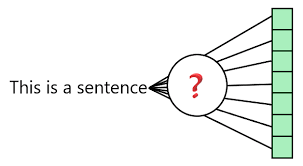


> `Created by: Jinnie Shin (jinnie.shin@ualberta.ca)`\
> `Date: `
---
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left">

 ### Required Packages or Dependencies

In [2]:
!pip install syllables #run this if you run into an error (download syllables)
import syllables
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.3/939.3 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 6.0.1
    Uninstalling importlib-resources-6.0.1:
      Successfully uninstalled importlib-resources-6.0.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.8.0
    Uninstalling importlib-metadata-6.8.0:
      Successfully uninstalled importlib-metadata-6.8.0



## **REVIEW**: Dataset

> Using the text_normalizer function we created last time, we will import `essay set 5`

#### Essay Set 8
`Prompt`: We all understand the benefits of laughter. For example, someone once said, "Laughter is the shortest distance between two people." Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part.


| Type of response            | Persuasive/Narrative/Expository |
|-----------------------------|---------------------------|
| Grade level                 | `10`                       |
| Total sample size           | `918`                |
| Average length of responses | `650 words`                  |
| Score range                 | `0-30`                       |

In [4]:
data = pd.read_excel('training_set_rel3.xlsx')
data = data[data.essay_set==8]
print(data.iloc[1].essay)

 Softball has to be one of the single most greatest sports alive; playing softball in college has always been a goal of mine. I love the dirt that sticks to your face, the sweat dripping from your forehead, and the gallons and gallons of water you poor all over yourself to keep cool in the blistering @CAPS2. Although I love softball I feel that the memories you acquire from the times you have with your teammates, are the things you remember the most through out your softball career. I have always had great memories through softball many laughs, tears, and frustrations so when I had the opportunity to play on a top notch team I looked forward to all the many more memories I would have.  Hood @CAPS1 @CAPS2 was my team name, I had played almost four years with this local team. Many of these girls were like sisters to me they had treated me amazingly through out my years playing with them. I felt like I had my set team, I was going to play with these girls all though high school and we wou


## 1. Extracting Descriptive Indices


In [13]:
def descriptives(text):
      ## the total number of sentences

    # import nbimporter
    # from week3 import text_normalize
    # normalizer = text_normalize()

    # sentences = normalizer.sent_tokenize(text)

    import nltk
    nltk.download("punkt", quiet = True)
    nltk.download("stopwords", quiet = True)

    sentences = nltk.tokenize.sent_tokenize(text)
    n_sentences = len(sentences)

      ## the total number of words (tokens)
    words = nltk.tokenize.word_tokenize(text)
    n_words = len(words)

      ## the total number of unique vocabulary
    unique_words = set(words)
    n_unique_words = len(unique_words)

      ## the total number of stop words
    stop_words = list(set(nltk.corpus.stopwords.words('english')))
    n_stopwords = len([i for i in words if i in stop_words])

    n_content_words = n_words - n_stopwords

      ## the total number of punctuation marks
    n_punc = len([i for i in words if i in """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""])

      ## total number of syllables
    n_syllables = np.sum([syllables.estimate(i) for i in words])

    ############################ MINI TASK ###################################

    #1. Total number of unique lemmas


    #2. Total number of unique stems



    ##########################################################################

    return n_sentences, n_words, n_unique_words, n_stopwords, n_punc, n_syllables #, n_lemmas, n_stems

> *Let's explore!*

In [7]:
text = data.iloc[0].essay

descriptives(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(39, 835, 257, 285, 128, 1007)

In [14]:
data["desc"] = data.essay.apply(str).apply(descriptives)

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

> ## Task 1: Descriptive Indices

> Q1. Let's apply the `descriptives` function to the entire dataframe (`data.essay`) and save them into a new column (`features`)

In [15]:
################# YOUR CODE HERE ############
data['features'] = data.essay.apply(descriptives)
data.features
############################################

12255     (39, 835, 257, 285, 128, 1007)
12256      (30, 863, 315, 348, 76, 1110)
12257      (39, 969, 330, 373, 96, 1312)
12258       (30, 765, 263, 376, 52, 962)
12259       (26, 708, 210, 336, 59, 806)
                      ...               
12973    (27, 1007, 347, 385, 134, 1291)
12974       (35, 666, 228, 256, 95, 806)
12975     (41, 997, 377, 380, 152, 1378)
12976       (39, 684, 258, 261, 99, 938)
12977       (29, 541, 235, 204, 66, 768)
Name: features, Length: 723, dtype: object

## 2. Readability Indices

In [20]:
class readability():

    def __init__(self):
        self.n_sent, self.n_word, self.n_unique, self.n_stop, self.n_punc, self.n_syll = descriptives(text)

    def fr_score(self, text):
        score = 206.835-1.015*(self.n_word/self.n_sent) - 84.6*(self.n_syll/self.n_word)
        return score

    def gf_score(self, text):
        score = 0.4*((self.n_word/self.n_sent)+ 100*(self.n_word))
        return score

    def smog(self, text):
        if self.n_sent > 30:
            score = 1.0430*np.sqrt(self.n_syll*(30/self.n_sent))+3.1291
            return score
        else:
            return print('total number of sentences are less than 30')

In [21]:
analyzer = readability()
print(analyzer.fr_score(text))
print(analyzer.gf_score(text))
print(analyzer.smog(text))

83.07700291724248
33408.5641025641
32.157785322254284


## 4. Computational Linguistic Features (Coh-Metrix)
> More information about Coh-metrix is available at:

In [ ]:
def coh_metrix():
    features = pd.read_excel('features.xlsx')
    features = features[features.essay_set ==8]

    #descriptive indices
    DI = features[['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESSL',
               'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd']]
    # various types of computational linguistic resources introduced as well :)


,TextID,domain1_score,domain2_score,essay_id,essay_set,DESPC,DESSC,DESWC,DESPL,DESPLd,...,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2
12255,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,34.0,NaN,20716,8,1,38,707,38,0,...,377.657013,423.114990,442.428986,4.543,5.187,1.755,1.299,87.954002,5.614,29.268999
12256,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,46.0,NaN,20717,8,1,30,785,30,0,...,361.216003,401.337006,425.963989,5.203,6.755,1.574,1.435,74.441002,9.377,26.313000
12257,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,40.0,NaN,20718,8,1,39,861,39,0,...,362.916992,402.194000,439.717011,4.861,6.612,1.485,1.452,72.500999,8.631,25.375999
12258,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,30.0,NaN,20719,8,1,27,708,27,0,...,362.027008,399.296997,417.182007,4.867,6.189,1.668,1.439,78.023003,8.891,24.730000


# 4. LFTK: Handcrafted Features in Computational Linguistics

More information about LFTK is available at: https://github.com/brucewlee/lftk

In [ ]:
!pip install lftk

!pip install spacy

!python -m spacy download en_core_web_sm

In [23]:
import spacy
import lftk

# load a trained pipeline of your choice from spacy
# remember we already downloaed "en_core_web_sm" pipeline above?
nlp = spacy.load("en_core_web_sm")

# create a spaCy doc object
doc = nlp("I love research but my professor is strange.")

# initiate LFTK extractor by passing in doc
# you can pass in a list of multiple docs
LFTK = lftk.Extractor(docs = doc)

# optionally, you can customize how LFTK extractor calculates handcrafted linguistic features
# for example, include stop word? include puncutaion? maximum decimal digits?
LFTK.customize(stop_words=True, punctuations=False, round_decimal=3)

# now, extract the handcrafted linguistic features that you need
# refer to them as feature keys

## Database of all LFTK features available
## https://docs.google.com/spreadsheets/d/1uXtQ1ah0OL9cmHp2Hey0QcHb4bifJcQFLvYlVIAWWwQ/edit#gid=693915416

extracted_features = LFTK.extract(features = ["a_word_ps", "a_kup_pw", "n_noun"])

# {'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}
print(extracted_features)

{'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}


In [27]:
lftk.search_features(family = "worddiff")

[{'key': 't_kup',
  'name': 'total_kuperman_age_of_acquistion_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'},
 {'key': 't_bry',
  'name': 'total_brysbaert_age_of_acquistion_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'},
 {'key': 't_subtlex_us_zipf',
  'name': 'total_subtlex_us_zipf_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'}]

In [49]:
#data["rater1_domain1"]
samp_essays["rater1_domain1"]

12427    13.0
12498    20.0
12275    20.0
12600    17.0
12942    20.0
12632    18.0
12565    16.0
12466    16.0
12516    20.0
12774    20.0
Name: rater1_domain1, dtype: float64

In [70]:
############################ MINI TASK ###################################

#1. Randomly sample 10 response from out dataset (only the raw responses)

samp_essays = data.sample(10).values

## sample.values doesn't keep column names, so we need column index locations
essay_index = data.columns.get_loc("essay")
score_index = data.columns.get_loc("rater1_domain1")

#2. Apply the LTFK functions to extract word difficulty related features

results = []

for i in samp_essays:

  samp = i[essay_index]
  samp_score = i[score_index]

  ## Have to feed raw string responses into nlp() function first
  ## nlp = spacy.load("en_core_web_sm") ABOVE
  sample = nlp(str(samp))
  LFTK_Extract = lftk.Extractor(docs = sample)
  features = LFTK_Extract.extract(features = ["t_kup", "t_bry", "t_subtlex_us_zipf"])

  t_kup = features["t_kup"]
  t_bry = features["t_bry"]
  t_sub = features["t_subtlex_us_zipf"]

  samp_result = [samp, samp_score, t_kup, t_bry, t_sub]

  results.append(samp_result)

##########################################################################

In [72]:
#3. [ADVANCED] Identify the features that are most highly associated with the essay score
results = pd.DataFrame(results)

print(results)

results.corr()

                                                   0     1        2         3  \
0   Softball has to be one of the single most gre...  21.0  3498.10  3139.936   
1  Friends are'nt always what we want them to be ...  19.0  2949.26  2554.374   
2   Someone once said laughter was the best medic...  15.0  3496.68  3073.133   
3   It was a day like any other. I was going to c...  20.0  3222.68  3001.552   
4                              Whats Laughter!How...  12.0  2800.93  2453.396   
5   Laughter is an essential component to any rel...  20.0  2803.35  2326.045   
6     Laughter "Laughter is the shortest distance...  13.0  1272.56  1070.001   
7     I was late like usual for the bus; barley h...  20.0  3559.80  3183.977   
8  Have you ever seen the phrase @CAPS1,@CAPS2,La...  15.0  2400.89  2181.310   
9  A true story about how two close friends becam...  15.0  3084.81  2798.301   

          4  
0  4246.797  
1  3825.348  
2  4568.240  
3  4045.915  
4  3716.982  
5  3230.890  
6  1710.80

<ipython-input-72-231cba7ef0fc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  results.corr()


,1,2,3,4
1,1.000000,0.565082,0.550965,0.402827
2,0.565082,1.000000,0.992160,0.974221
3,0.550965,0.992160,1.000000,0.977656
4,0.402827,0.974221,0.977656,1.000000
